In [1]:
import torch

In [2]:
device = "cuda"  if torch.cuda.is_available() else "cpu"
device

'cpu'

# Get Data

In [3]:
import requests
from pathlib import Path
import zipfile

data_path = Path("data/")
image_path_train = data_path / "train"
image_path_test = data_path / "test"

if image_path_train.is_dir():
  print(f"{image_path_train} directory exists.")
else:
  print(f"Did not find {image_path_train} directory, creating one...")
  image_path_train.mkdir(parents=True, exist_ok=True)

if image_path_test.is_dir():
  print(f"{image_path_test} directory exists.")
else:
  print(f"Did not find {image_path_test} directory, creating one...")
  image_path_test.mkdir(parents=True, exist_ok=True)

Did not find data/train directory, creating one...
Did not find data/test directory, creating one...


In [4]:
!apt-get install git
!git init
!git remote add origin https://github.com/ThanawatRung/Durian_Ai.git
!git config core.sparseCheckout true
!echo "dataset_durian/" >> .git/info/sparse-checkout
!git pull origin main

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/
remote: Enumerating objects: 439, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 439 (delta 2), reused 10 (delta 2), pack-reused 429 (from 1)
Receiving objects: 100% (439/439), 46

# Make class folder in train and test folder

In [5]:
import os

# Define source and destination paths
source_dir = "/content/dataset_durian"
train_dir = "/content/data/train"
test_dir = "/content/data/test"

# List of classes (folders)
classes = ['AlgalLeafSpot', 'LeafBlight', 'LeafSpot', 'NoDisease']

for class_name in classes:
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

# Split the data for train and test 70,30

In [6]:
import shutil
from sklearn.model_selection import train_test_split

for class_name in classes:
    # Get all images from the class folder
    class_dir = os.path.join(source_dir, class_name)
    images = os.listdir(class_dir)
    images = [img for img in images if img.endswith(".jpg") or img.endswith(".png")]

    # Split images into train (70%) and test (30%)
    train_images, test_images = train_test_split(images, test_size=0.3, random_state=42)

    # Copy the images to the corresponding train/test directories
    for img in train_images:
        shutil.copy(os.path.join(class_dir, img), os.path.join(train_dir, class_name, img))

    for img in test_images:
        shutil.copy(os.path.join(class_dir, img), os.path.join(test_dir, class_name, img))

# Look at the amout of picture in folder

In [7]:
class_AlgalLeafSpot_train  = os.path.join(train_dir,classes[0])
images_AlgalLeafSpot_train = os.listdir(class_AlgalLeafSpot_train)
print(f"There are {len(images_AlgalLeafSpot_train)} images in {class_AlgalLeafSpot_train}")

There are 73 images in /content/data/train/AlgalLeafSpot


In [8]:
class_AlgalLeafSpot_test  = os.path.join(test_dir,classes[0])
images_AlgalLeafSpot_test = os.listdir(class_AlgalLeafSpot_test)
print(f"There are {len(images_AlgalLeafSpot_test)} images in {class_AlgalLeafSpot_test}")

There are 32 images in /content/data/test/AlgalLeafSpot


In [9]:
class_LeafBlight_train  = os.path.join(train_dir,classes[1])
images_LeafBlight_train = os.listdir(class_LeafBlight_train)
print(f"There are {len(images_LeafBlight_train)} images in {class_LeafBlight_train}")

There are 73 images in /content/data/train/LeafBlight


In [10]:
class_LeafBlight_test  = os.path.join(test_dir,classes[1])
images_LeafBlight_test = os.listdir(class_LeafBlight_test)
print(f"There are {len(images_LeafBlight_test)} images in {class_LeafBlight_test}")

There are 32 images in /content/data/test/LeafBlight


In [11]:
class_LeafSpot_train = os.path.join(train_dir,classes[2])
images_LeafSpot_train = os.listdir(class_LeafSpot_train)
print(f"There are {len(images_LeafSpot_train)} images in {class_LeafSpot_train}")

There are 73 images in /content/data/train/LeafSpot


In [12]:
class_LeafSpot_test = os.path.join(test_dir,classes[2])
images_LeafSpot_test = os.listdir(class_LeafSpot_test)
print(f"There are {len(images_LeafSpot_test)} images in {class_LeafSpot_test}")

There are 32 images in /content/data/test/LeafSpot


In [13]:
class_NoDisease_train = os.path.join(train_dir,classes[3])
images_NoDisease_train = os.listdir(class_NoDisease_train)
print(f"There are {len(images_NoDisease_train)} images in {class_NoDisease_train}")

There are 73 images in /content/data/train/NoDisease


In [14]:
class_NoDisease_test = os.path.join(test_dir,classes[3])
images_NoDisease_test = os.listdir(class_NoDisease_test)
print(f"There are {len(images_NoDisease_test)} images in {class_NoDisease_test}")

There are 32 images in /content/data/test/NoDisease


# Visualize an image

Image class: AlgalLeafSpot
Random image path: /content/data/train/AlgalLeafSpot/AlgalLeafSpot076_jpg.rf.522efca2aa6572bc5062b4270e4f1109.jpg

Image height: 640
Image width: 640


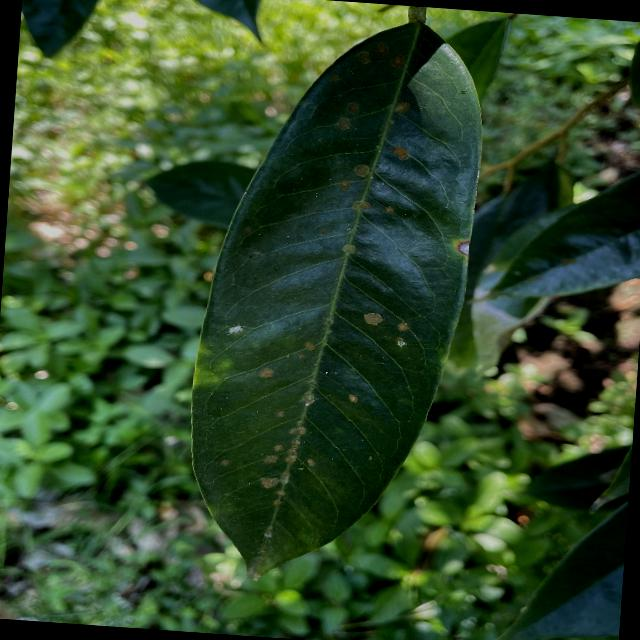

In [15]:
import random
from PIL import Image

#random.seed(42)

image_path_list = list(Path(class_AlgalLeafSpot_train).glob("*")) # can change class to look other image.
image_path = random.choice(image_path_list)

random_image_class = image_path.parent.stem
print(f"Image class: {random_image_class}")

img = Image.open(image_path)

# Print metadata
print(f"Random image path: {image_path}")
print(f"\nImage height: {img.height}")
print(f"Image width: {img.width}")
img

# Transforming data


In [16]:
from torchvision import transforms,datasets
from torch.utils.data import DataLoader

In [17]:
# Define transformations with augmentation
data_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.RandomRotation(30),
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize((0.3, 0.3, 0.3), (0.5, 0.5, 0.5))
])

In [18]:
data_transform(img).shape

torch.Size([3, 128, 128])

# Look at the picture that transform

In [19]:
from matplotlib import pyplot as plt

def plot_transformed_images(image_paths, transform, n=3, seed=None):
  """
  Selected random images from path of images and loads/transforms them
  then plots the original vs transformed version
  """

  if seed:
    random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1,ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original \nSize: {f.size}")
      ax[0].axis(False)

      #Transform and plot target image
      transformed_image = transform(f).permute(1,2,0) #note we will need to change  for matplotlib (C,H,W) -> (H,W,C)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed \nShape: {transformed_image.shape}")
      ax[1].axis(False)

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=30)

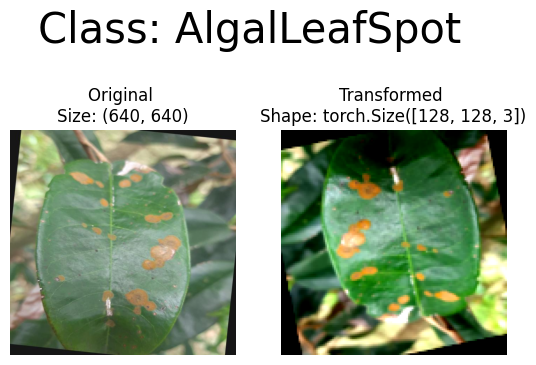

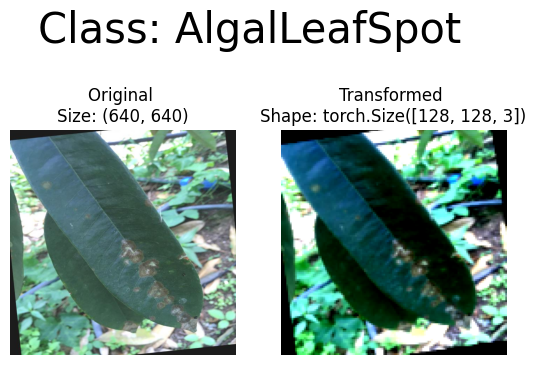

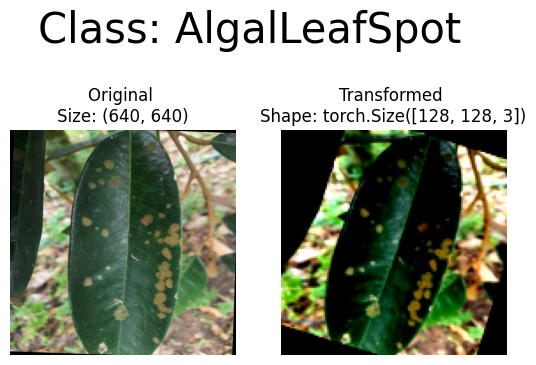

In [20]:
plot_transformed_images(image_path_list, data_transform)

# Loading image data

In [21]:
train_data = datasets.ImageFolder(root='/content/data/train',
                                  transform=data_transform, # a transform for the data
                                  target_transform=None) # a transform for the label/target

test_data = datasets.ImageFolder(root='/content/data/test',
                                 transform=data_transform,
                                 target_transform=None)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 292
    Root location: /content/data/train
    StandardTransform
Transform: Compose(
               RandomHorizontalFlip(p=0.5)
               RandomVerticalFlip(p=0.5)
               RandomRotation(degrees=[-30.0, 30.0], interpolation=nearest, expand=False, fill=0)
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=(0.3, 0.3, 0.3), std=(0.5, 0.5, 0.5))
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 128
    Root location: /content/data/test
    StandardTransform
Transform: Compose(
               RandomHorizontalFlip(p=0.5)
               RandomVerticalFlip(p=0.5)
               RandomRotation(degrees=[-30.0, 30.0], interpolation=nearest, expand=False, fill=0)
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=(

In [22]:
class_names = train_data.classes
class_names

['AlgalLeafSpot', 'LeafBlight', 'LeafSpot', 'NoDisease']

In [23]:
class_dict = train_data.class_to_idx
class_dict

{'AlgalLeafSpot': 0, 'LeafBlight': 1, 'LeafSpot': 2, 'NoDisease': 3}

In [24]:
len(train_data), len(test_data)

(292, 128)

In [25]:
train_data[0][0].shape

torch.Size([3, 128, 128])

# Turn data in to dataloader

In [26]:
BATCH_SIZE = 32
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=1,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=1,
                             shuffle=False)

print(f"train_dataloader:{len(train_dataloader)},test_dataloader:{len(test_dataloader)}")
print(f"train_data:{len(train_data)},test_data:{len(test_data)}")


train_dataloader:10,test_dataloader:4
train_data:292,test_data:128


In [27]:
img,label = next(iter(train_dataloader))

# Batch size will now be 1 , you can change the batch size if you like
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([32, 3, 128, 128]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([32])


In [28]:
img,label

(tensor([[[[-0.6000, -0.6000, -0.6000,  ..., -0.6000, -0.6000, -0.6000],
           [-0.6000, -0.6000, -0.6000,  ..., -0.6000, -0.6000, -0.6000],
           [-0.6000, -0.6000, -0.6000,  ..., -0.6000, -0.6000, -0.6000],
           ...,
           [-0.6000, -0.6000, -0.6000,  ..., -0.6000, -0.6000, -0.6000],
           [-0.6000, -0.6000, -0.6000,  ..., -0.6000, -0.6000, -0.6000],
           [-0.6000, -0.6000, -0.6000,  ..., -0.6000, -0.6000, -0.6000]],
 
          [[-0.6000, -0.6000, -0.6000,  ..., -0.6000, -0.6000, -0.6000],
           [-0.6000, -0.6000, -0.6000,  ..., -0.6000, -0.6000, -0.6000],
           [-0.6000, -0.6000, -0.6000,  ..., -0.6000, -0.6000, -0.6000],
           ...,
           [-0.6000, -0.6000, -0.6000,  ..., -0.6000, -0.6000, -0.6000],
           [-0.6000, -0.6000, -0.6000,  ..., -0.6000, -0.6000, -0.6000],
           [-0.6000, -0.6000, -0.6000,  ..., -0.6000, -0.6000, -0.6000]],
 
          [[-0.6000, -0.6000, -0.6000,  ..., -0.6000, -0.6000, -0.6000],
           [-

# Create the model ResNet18 Transfer learning

In [29]:
from torch import nn
import torchvision
from torchvision import models
from sklearn.metrics import accuracy_score

class TransferLearningModel(nn.Module):
    def __init__(self, num_classes):
        super(TransferLearningModel, self).__init__()
        self.model = models.resnet18(weights=torchvision.models.ResNet18_Weights.DEFAULT)
        in_features = self.model.fc.in_features
        self.model.fc = nn.Linear(in_features, num_classes)

    def forward(self, x):
        return self.model(x)

# Train model

In [30]:
from tqdm.auto import tqdm

num_classes = len(class_names)  # Adjust based on your dataset
model = TransferLearningModel(num_classes=num_classes)

# Hyperparameters
learning_rate = 0.001
num_epochs = 15

# Initialize loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Move model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Training loop
for epoch in tqdm(range(num_epochs)):
    model.train()
    running_loss = 0.0
    correct_preds = 0
    total_preds = 0

    for images, labels in train_dataloader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total_preds += labels.size(0)
        correct_preds += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_data)
    epoch_accuracy = correct_preds / total_preds

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}')

# Evaluation
model.eval()
all_labels = []
all_preds = []

with torch.inference_mode():
    for images, labels in test_dataloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

accuracy = accuracy_score(all_labels, all_preds)
print(f'Test Accuracy: {accuracy:.4f}')

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 140MB/s]


  0%|          | 0/15 [00:00<?, ?it/s]

Epoch 1/15, Loss: 0.9549, Accuracy: 0.6199
Epoch 2/15, Loss: 0.7097, Accuracy: 0.8253
Epoch 3/15, Loss: 0.5611, Accuracy: 0.8356
Epoch 4/15, Loss: 0.3604, Accuracy: 0.8699
Epoch 5/15, Loss: 0.3626, Accuracy: 0.8733
Epoch 6/15, Loss: 0.3753, Accuracy: 0.8767
Epoch 7/15, Loss: 0.3170, Accuracy: 0.8904
Epoch 8/15, Loss: 0.2375, Accuracy: 0.9247
Epoch 9/15, Loss: 0.2694, Accuracy: 0.9075
Epoch 10/15, Loss: 0.2309, Accuracy: 0.9281
Epoch 11/15, Loss: 0.2508, Accuracy: 0.9349
Epoch 12/15, Loss: 0.1918, Accuracy: 0.9349
Epoch 13/15, Loss: 0.2503, Accuracy: 0.9247
Epoch 14/15, Loss: 0.1490, Accuracy: 0.9589
Epoch 15/15, Loss: 0.1510, Accuracy: 0.9589
Test Accuracy: 0.9609


In [31]:
prediction = model(img.to(device))

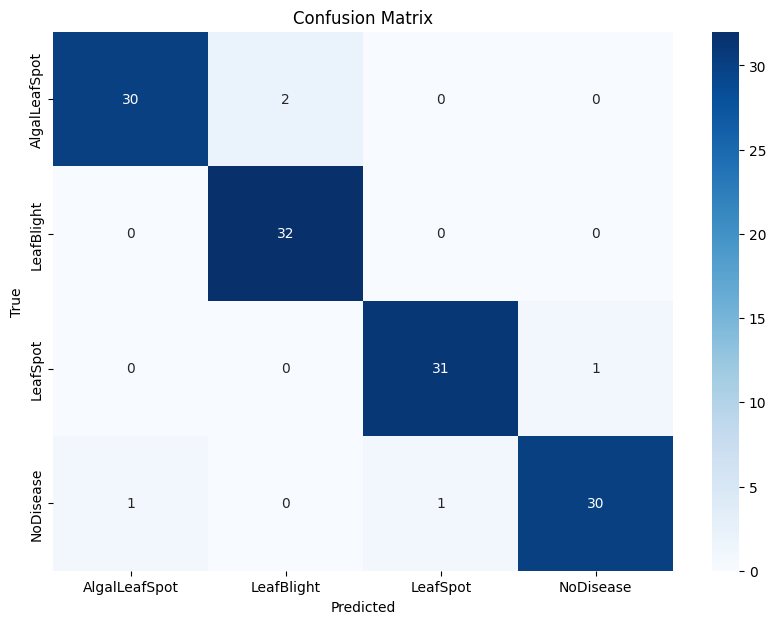

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(all_labels, all_preds, labels=list(range(num_classes)))

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [33]:
model.eval()
all_labels = []
all_preds = []

with torch.inference_mode():
    for images, labels in test_dataloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        y_prob = torch.nn.functional.softmax(outputs, dim=1)
        print(y_prob)

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

        print('---------------------------')
        print(labels.cpu().numpy())
        print(predicted.cpu().numpy())
        print('---------------------------')


tensor([[9.9761e-01, 1.7539e-04, 1.6518e-04, 2.0487e-03],
        [9.9664e-01, 9.6749e-05, 3.0137e-05, 3.2368e-03],
        [9.9786e-01, 1.7117e-04, 6.0269e-05, 1.9130e-03],
        [9.9623e-01, 1.2429e-03, 3.1992e-05, 2.4949e-03],
        [9.8979e-01, 3.8996e-03, 1.2810e-03, 5.0326e-03],
        [9.9892e-01, 2.6230e-07, 1.0495e-06, 1.0779e-03],
        [9.8888e-01, 2.3118e-03, 5.7016e-04, 8.2345e-03],
        [9.8692e-01, 6.1183e-03, 3.6847e-03, 3.2808e-03],
        [9.9915e-01, 2.8983e-06, 1.7995e-05, 8.3084e-04],
        [9.9792e-01, 7.6185e-05, 1.7627e-05, 1.9853e-03],
        [9.8609e-01, 5.4892e-03, 5.6477e-04, 7.8568e-03],
        [9.8875e-01, 5.4485e-03, 3.0426e-04, 5.5014e-03],
        [7.7216e-01, 2.1240e-01, 9.8472e-03, 5.5981e-03],
        [9.9829e-01, 2.3269e-04, 4.6089e-05, 1.4274e-03],
        [9.9810e-01, 5.0990e-05, 1.4556e-05, 1.8299e-03],
        [9.9311e-01, 2.4128e-03, 2.1821e-03, 2.2998e-03],
        [9.5312e-01, 4.1019e-02, 1.4192e-03, 4.4443e-03],
        [9.905

In [34]:
model.state_dict()

OrderedDict([('model.conv1.weight',
              tensor([[[[-1.0768e-02, -6.3711e-03, -2.1655e-03,  ...,  5.5812e-02,
                          1.7292e-02, -1.2338e-02],
                        [ 1.0283e-02,  5.8232e-03, -1.1263e-01,  ..., -2.7148e-01,
                         -1.2860e-01,  3.0770e-03],
                        [-7.2858e-03,  5.7911e-02,  2.9566e-01,  ...,  5.2221e-01,
                          2.5956e-01,  6.4566e-02],
                        ...,
                        [-2.8113e-02,  1.3691e-02,  7.1265e-02,  ..., -3.3272e-01,
                         -4.1997e-01, -2.5667e-01],
                        [ 3.0822e-02,  3.8987e-02,  6.2082e-02,  ...,  4.1470e-01,
                          3.9393e-01,  1.6592e-01],
                        [-1.3276e-02, -5.4771e-03, -2.4912e-02,  ..., -1.5079e-01,
                         -8.3115e-02, -7.2504e-03]],
              
                       [[-9.8175e-03, -2.6429e-02, -3.4587e-02,  ...,  3.2236e-02,
                          

# Save the model

In [35]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "Durian_Ai.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(),
           f=MODEL_SAVE_PATH)



Saving model to: models/Durian_Ai.pth


# Load model

In [36]:
loading_model = TransferLearningModel(num_classes=num_classes) # num_classes=4
loading_model.load_state_dict(torch.load(MODEL_SAVE_PATH)) # Path file that you save

loading_model = loading_model.to(device)

<ipython-input-36-6dd5427ae48e>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loading_model.load_state_dict(torch.load(MODEL_SAVE_PATH)) # PAth file that you save


In [37]:
loading_model.state_dict()

OrderedDict([('model.conv1.weight',
              tensor([[[[-1.0768e-02, -6.3711e-03, -2.1655e-03,  ...,  5.5812e-02,
                          1.7292e-02, -1.2338e-02],
                        [ 1.0283e-02,  5.8232e-03, -1.1263e-01,  ..., -2.7148e-01,
                         -1.2860e-01,  3.0770e-03],
                        [-7.2858e-03,  5.7911e-02,  2.9566e-01,  ...,  5.2221e-01,
                          2.5956e-01,  6.4566e-02],
                        ...,
                        [-2.8113e-02,  1.3691e-02,  7.1265e-02,  ..., -3.3272e-01,
                         -4.1997e-01, -2.5667e-01],
                        [ 3.0822e-02,  3.8987e-02,  6.2082e-02,  ...,  4.1470e-01,
                          3.9393e-01,  1.6592e-01],
                        [-1.3276e-02, -5.4771e-03, -2.4912e-02,  ..., -1.5079e-01,
                         -8.3115e-02, -7.2504e-03]],
              
                       [[-9.8175e-03, -2.6429e-02, -3.4587e-02,  ...,  3.2236e-02,
                          